In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("geo data.csv")
data.head(5)

,Hamlet,Household_ID,Container_ID,Container_position,Water_level,Lid,Fish,Meso,Micronecta,Source,...,Lat,Long,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,0,1,1,0,25,1,0,0,0,0,...,10.175487,106.153457,10.171487,4,0.004,10.175487,106.152457,1,0.001,106.153457
1,0,2,2,1,25,1,0,0,0,1,...,10.177487,106.156457,10.171487,6,0.006,10.177487,106.152457,4,0.004,106.156457
2,0,2,5,0,25,0,0,0,0,1,...,10.173487,106.155457,10.171487,2,0.002,10.173487,106.152457,3,0.003,106.155457
3,0,2,6,0,25,1,0,0,0,0,...,10.176487,106.159457,10.171487,5,0.005,10.176487,106.152457,7,0.007,106.159457
4,0,3,5,1,30,1,0,0,0,0,...,10.175487,106.160457,10.171487,4,0.004,10.175487,106.152457,8,0.008,106.160457


In [34]:
pos_data = data[data['Larvae'] == 1]
df = pos_data[pos_data['Full count Larvae']<700]
use_data = df['Full count Larvae']
use_data.describe()

count     49.000000
mean      49.393878
std       66.514674
min        2.000000
25%        9.000000
50%       24.000000
75%       50.000000
max      271.600000
Name: Full count Larvae, dtype: float64

In [41]:
pos_data = data[data['Larvae'] == 1]
low_pos_data = pos_data[pos_data['Full count Larvae'] < 25]
mid_pos_data = pos_data[pos_data['Full count Larvae'] < 50]
hi_pos_data = pos_data[pos_data['Full count Larvae'] > 50]



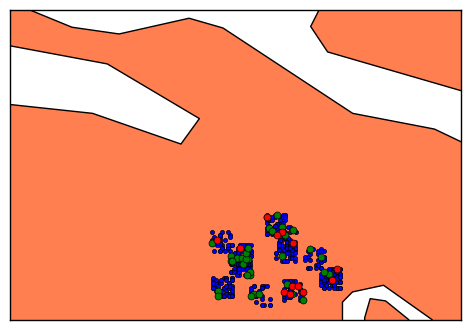

In [45]:
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import matplotlib.pyplot as plt
minlong, maxlong = 106.05, 106.22
minlat, maxlat = 10.165, 10.28

map = Basemap(llcrnrlon=minlong, llcrnrlat=minlat,
             urcrnrlon=maxlong, urcrnrlat=maxlat, projection='merc', resolution='h')

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()

x, y = map(data['Long'].tolist(), data['Lat'].tolist())
a, b = map(low_pos_data['Long'].tolist(), low_pos_data['Lat'].tolist())
c, d = map(mid_pos_data['Long'].tolist(), mid_pos_data['Lat'].tolist())
e, f = map(hi_pos_data['Long'].tolist(), hi_pos_data['Lat'].tolist())
#long first then lat
map.plot(x, y, 'bo', markersize=3)
map.plot(a, b, 'r+', markersize=5)
map.plot(c, d, 'go', markersize=5)
map.plot(e, f, 'ro', markersize=5)
plt.show()

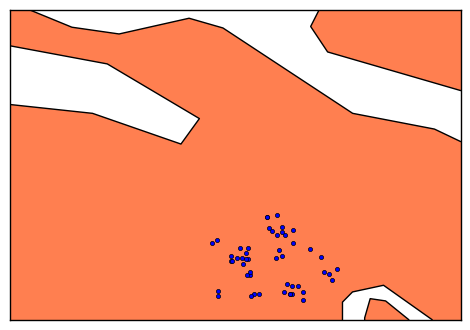

In [5]:
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
minlong, maxlong = 106.05, 106.22
minlat, maxlat = 10.165, 10.28

map = Basemap(llcrnrlon=minlong, llcrnrlat=minlat,
             urcrnrlon=maxlong, urcrnrlat=maxlat, projection='merc', resolution='h')

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()

x, y = map(pos_data['Long'].tolist(), pos_data['Lat'].tolist())
#long first then lat
map.plot(x, y, 'bo', markersize=3)

plt.show()

In [27]:
lats, lons = [], []
import csv
import numpy as np 

with open('geo data.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        lats.append(float(row[14]))
        lons.append(float(row[15]))


In [1]:
m = Basemap(llcrnrlon=minlong, llcrnrlat=minlat,
             urcrnrlon=maxlong, urcrnrlat=maxlat, projection='merc', resolution='h')

m.drawcoastlines()
m.drawcountries()
m.drawstates() 

db = 1 # bin padding
lon_bins = np.linspace(min(lons)-db, max(lons)+db, 5+1) # 10 bins
lat_bins = np.linspace(min(lats)-db, max(lats)+db, 5+1) # 13 bins

density, _, _ = np.histogram2d(lats, lons, [lat_bins, lon_bins])
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)
xs, ys = m(lon_bins_2d, lat_bins_2d)

cdict = {'red':  ( (0.0,  1.0,  1.0),
                   (1.0,  0.9,  1.0) ),
         'green':( (0.0,  1.0,  1.0),
                   (1.0,  0.03, 0.0) ),
         'blue': ( (0.0,  1.0,  1.0),
                   (1.0,  0.16, 0.0) ) }
custom_map = LinearSegmentedColormap('custom_map', cdict)
plt.register_cmap(cmap=custom_map)


# add histogram squares and a corresponding colorbar to the map:
plt.pcolormesh(xs, ys, density, cmap="custom_map")

cbar = plt.colorbar(orientation='horizontal', shrink=0.625, aspect=20, fraction=0.2,pad=0.02)
cbar.set_label('Number of earthquakes',size=18)
#plt.clim([0,100])


# translucent blue scatter plot of epicenters above histogram:    
x,y = m(lons, lats)
m.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='#424FA4',markeredgecolor="none", alpha=0.33)
 
    
# http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawmapscale
#m.drawmapscale(-119-6, 37-7.2, -119-6, 37-7.2, 500, barstyle='fancy', yoffset=20000)
    
    
# make image bigger:
#plt.gcf().set_size_inches(7,7)

plt.show()

NameError: name 'Basemap' is not defined

In [ ]:
# Use orthographic projection centered on California with corners
# defined by number of meters from center position:


    
# ######################################################################
# bin the epicenters (adapted from 
# http://stackoverflow.com/questions/11507575/basemap-and-density-plots)

# compute appropriate bins to chop up the data:
db = 1 # bin padding
lon_bins = np.linspace(min(lons)-db, max(lons)+db, 10+1) # 10 bins
lat_bins = np.linspace(min(lats)-db, max(lats)+db, 13+1) # 13 bins
    
density, _, _ = np.histogram2d(lats, lons, [lat_bins, lon_bins])

# Turn the lon/lat of the bins into 2 dimensional arrays ready
# for conversion into projected coordinates
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)

# convert the bin mesh to map coordinates:
xs, ys = m(lon_bins_2d, lat_bins_2d) # will be plotted using pcolormesh
# ######################################################################



# define custom colormap, white -> nicered, #E6072A = RGB(0.9,0.03,0.16)
cdict = {'red':  ( (0.0,  1.0,  1.0),
                   (1.0,  0.9,  1.0) ),
         'green':( (0.0,  1.0,  1.0),
                   (1.0,  0.03, 0.0) ),
         'blue': ( (0.0,  1.0,  1.0),
                   (1.0,  0.16, 0.0) ) }
custom_map = LinearSegmentedColormap('custom_map', cdict)
plt.register_cmap(cmap=custom_map)


# add histogram squares and a corresponding colorbar to the map:
plt.pcolormesh(xs, ys, density, cmap="custom_map")

cbar = plt.colorbar(orientation='horizontal', shrink=0.625, aspect=20, fraction=0.2,pad=0.02)
cbar.set_label('Number of earthquakes',size=18)
#plt.clim([0,100])


# translucent blue scatter plot of epicenters above histogram:    
x,y = m(lons, lats)
m.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='#424FA4',markeredgecolor="none", alpha=0.33)
 
    
# http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawmapscale
m.drawmapscale(-119-6, 37-7.2, -119-6, 37-7.2, 500, barstyle='fancy', yoffset=20000)
    
    
# make image bigger:
plt.gcf().set_size_inches(15,15)

plt.show()